# Linear Regression


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ModelAuto as ma

In [11]:
#!pip install ModelAuto

In [12]:
data = pd.read_csv('/content/car data.csv')

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [14]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [15]:
x = data.iloc[:,[0,2,3,4,5,6,7]]
y = data.iloc[:,1]

In [16]:
y = y.fillna(y.mean())

In [17]:
pre = ma.Datapreprocess.Preprocessing(x)

Data Preprocessing...
Done!


In [18]:
pre

,Year,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Dealer,Individual,Manual
0,0.733333,0.057109,0.053053,0.0,0,1,1,0,1
1,0.666667,0.099913,0.085085,0.0,1,0,1,0,1
2,0.933333,0.103273,0.012813,0.0,0,1,1,0,1
3,0.533333,0.041504,0.009409,0.0,0,1,1,0,1
4,0.733333,0.070980,0.083984,0.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
296,0.866667,0.122237,0.067043,0.0,1,0,1,0,1
297,0.800000,0.060468,0.119119,0.0,0,1,1,0,1
298,0.400000,0.115735,0.175043,0.0,0,1,1,0,1
299,0.933333,0.131990,0.017017,0.0,1,0,1,0,1


Feature Analysing...
. . . . . . . . . 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


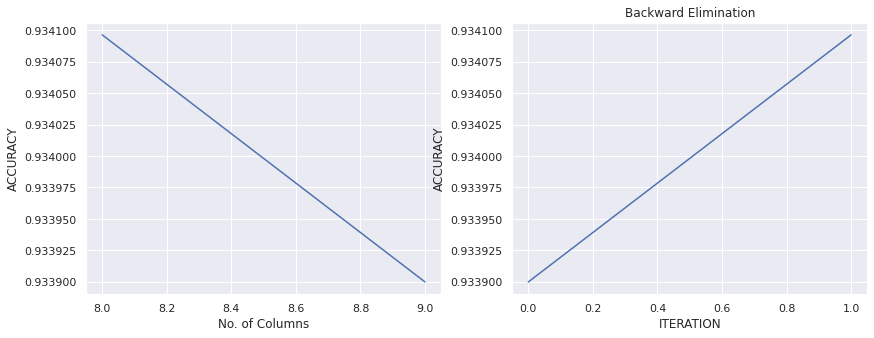

In [19]:
selected = ma.FeatureSelection.backwardElimination(pre,y)

In [20]:
selected.shape

(301, 7)

Building Model From Scratch

In [21]:
import torch as th

In [22]:
def loss(pred,target):
  '''
    loss = Sum( (pred - target)^2 )/ len( train dataset )
  '''
  diff = pred - target

  sum = th.sum(diff*diff)
 
  return sum/diff.numel()

def model(x):
  return x @ weights.t() +intercept


In [47]:
inputs = th.from_numpy(selected.values).float()
target = th.from_numpy(y.values).float()

In [48]:
inputs.dtype

torch.float32

In [49]:
weights = th.randn(inputs.shape[1],requires_grad=True).float()
intercept = th.randn(1,requires_grad=True).float()

In [50]:
pred = model(inputs)

In [51]:
Loss = loss(pred,target)

In [52]:
Loss

tensor(40.7645, grad_fn=<DivBackward0>)

In [54]:
lr_rate = 0.001

In [55]:
weights.grad

tensor([-6.0202, -1.4381, -0.5826, -0.0466, -3.9049, -0.4001, -5.3726])

In [73]:
Loss.backward()
with th.no_grad(): # This is to tell pytorch we should not change the gradients while we are updating the weights nd biases
  weights.sub_(lr_rate*weights.grad)
  intercept.sub_(lr_rate*intercept.grad)
  # weights = th.tensor(weights - lr_rate*weights.grad,requires_grad=True)
  # intercept = th.tensor(intercept - lr_rate*intercept.grad,requires_grad=True)
  weights.grad.zero_()
  intercept.grad.zero_()

In [74]:
pred = model(inputs)
Loss = loss(pred,target)
#Loss.backward()
Loss

tensor(39.9210, grad_fn=<DivBackward0>)

In [ ]:
65.5139,

None
tensor([0.1571], requires_grad=True)


In [ ]:
th.tensor(weights,requires_grad=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([ 0.5316, -0.7920,  0.8473,  0.9470, -0.1390,  0.7641,  0.4665],
       requires_grad=True)

tensor([ 0.5316, -0.7920,  0.8473,  0.9470, -0.1390,  0.7641,  0.4665])

In [90]:
target.shape

torch.Size([301])

In [75]:
# Clubbing All of them Together

In [190]:
class LinearRegression:

  def __init__(self,input,target):
    self.input = th.from_numpy(np.array(input)).float()
    self.target = th.from_numpy(np.array(target)).float()
    self.weights = th.rand(self.input.shape[1],requires_grad=True).float()
    self.intercept = th.rand(1,requires_grad=True).float()
    self.costs = []

 

  def loss(self,pred,target):
    diff = pred - target
    sum = th.sum(diff*diff)
    return sum/diff.numel()

  def model(self,epochs,lr_rate=0.001):

    for i in range(epochs):
      # Getting the equation based on calculated Weight nd intercept
      pred = self.input @ self.weights.t() + self.intercept
      # Getting the loss 
      Loss = loss(pred,self.target)
      self.costs.append(Loss)
      # Applying Gradient Decent and Updating Weights nd Intercept
      Loss.backward()
      with th.no_grad():
        self.weights.sub_(lr_rate*self.weights.grad)
        self.intercept.sub_(lr_rate*self.intercept.grad)
        # Assigning Gradinets back to zero
        self.weights.grad.zero_()
        self.intercept.grad.zero_()
    
    pred = self.input @ self.weights.t() + self.intercept
    accuacy = self.accuracy(self.target,pred)
    print('Accuracy : ',accuacy.detach().numpy()*100,"%")
    return (pred,self.target)

  def accuracy(self,target,pred):
    return 1 - (th.sum(th.square(target - pred))/(th.sum(th.square(target-th.mean(target)))))

 

  def cost_graph(self):
    x = np.linspace(0,len(self.costs),len(self.costs))
    #print('okk :',type(x),type(self.costs))
    plt.scatter(np.array(x),np.array(self.costs))
    #print('okk :',type(x),type(self.costs))
    plt.show()

      



In [191]:
lr = LinearRegression(selected,target)

In [192]:
p,t=lr.model(epochs=10000)

Accuracy :  64.47733044624329 %


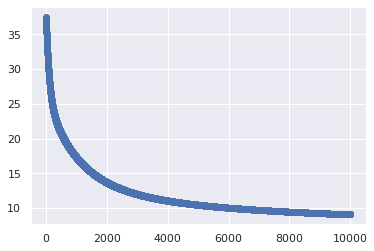

In [181]:
lr.cost_graph()